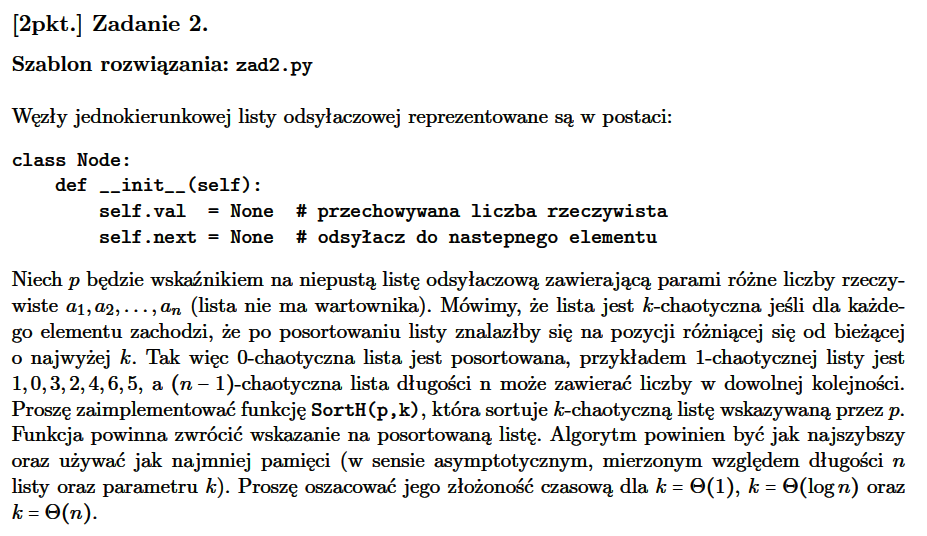

### Testy

##### Testy dostarczone wraz z zadaniem

In [1]:
class Node:
    def __init__(self):
        self.val = None
        self.next = None


L0 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89]
L1 = [2, 5, 3, 7, 13, 11, 17, 19, 29, 23, 31, 37, 43, 41, 47, 53, 59, 67, 61, 73, 71, 79, 83, 89]
L2 = [2, 3, 5, 7, 11, 13, 17, 19, 31, 23, 29, 43, 41, 37, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89]
L5 = [2, 11, 5, 7, 3, 31, 13, 19, 37, 29, 17, 23, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89]
L10 = [2, 3, 11, 7, 5, 23, 17, 19, 13, 29, 41, 37, 31, 89, 47, 53, 59, 61, 67, 71, 73, 43, 83, 79]
L20 = [2, 79, 5, 7, 11, 23, 17, 19, 13, 29, 3, 37, 41, 89, 47, 53, 59, 61, 31, 71, 73, 67, 83, 43]

TESTS = [(L1, 1), (L2, 2), (L5, 5), (L10, 10), (L20, 20)]


def printList(p):
    while p != None:
        print(p.val, end=' ')
        p = p.next
    print()


def makeList(l):
    n = len(l)
    p = None
    for i in range(n - 1, -1, -1):
        q = Node()
        q.val = l[i]
        q.next = p
        p = q
    return p


def length(p):
    res = 0
    while p != None:
        res += 1
        p = p.next
    return res


def list2set(p):
    res = set()
    while p != None:
        res.add(p.val)
        p = p.next
    return res


def isorder(p):
    q = p.next
    while q != None:
        if p.val > q.val: return False
        p = p.next
        q = q.next
    return True


def isok(we, wy):
    if length(we) != length(wy): return False
    if list2set(we) != list2set(wy): return False
    return isorder(wy)


def runtests(f):
    OK = True
    for ls, k in TESTS:
        ll = makeList(ls)

        print("----------------------")
        print("inp = ", end='')
        printList(ll)

        res = f(ll, k)
        ll = makeList(ls)

        print("out = ", end='')
        printList(res)

        if not isok(ll, res):
            print("Blad!")
            OK = False
        else:
            print('OK')
    print("----------------------")

    if OK:
        print("OK!")
    else:
        print("Bledy!")

# I Sposób
### Złożoność obliczeniowa $ O(n \cdot log(k)) $ (najlepszy sposób)
##### Z wykorzystaniem kopca binarnego (Min Heap)

### Omówienie algorytmu

Wyjaśnienie poniżej na ilustracji.

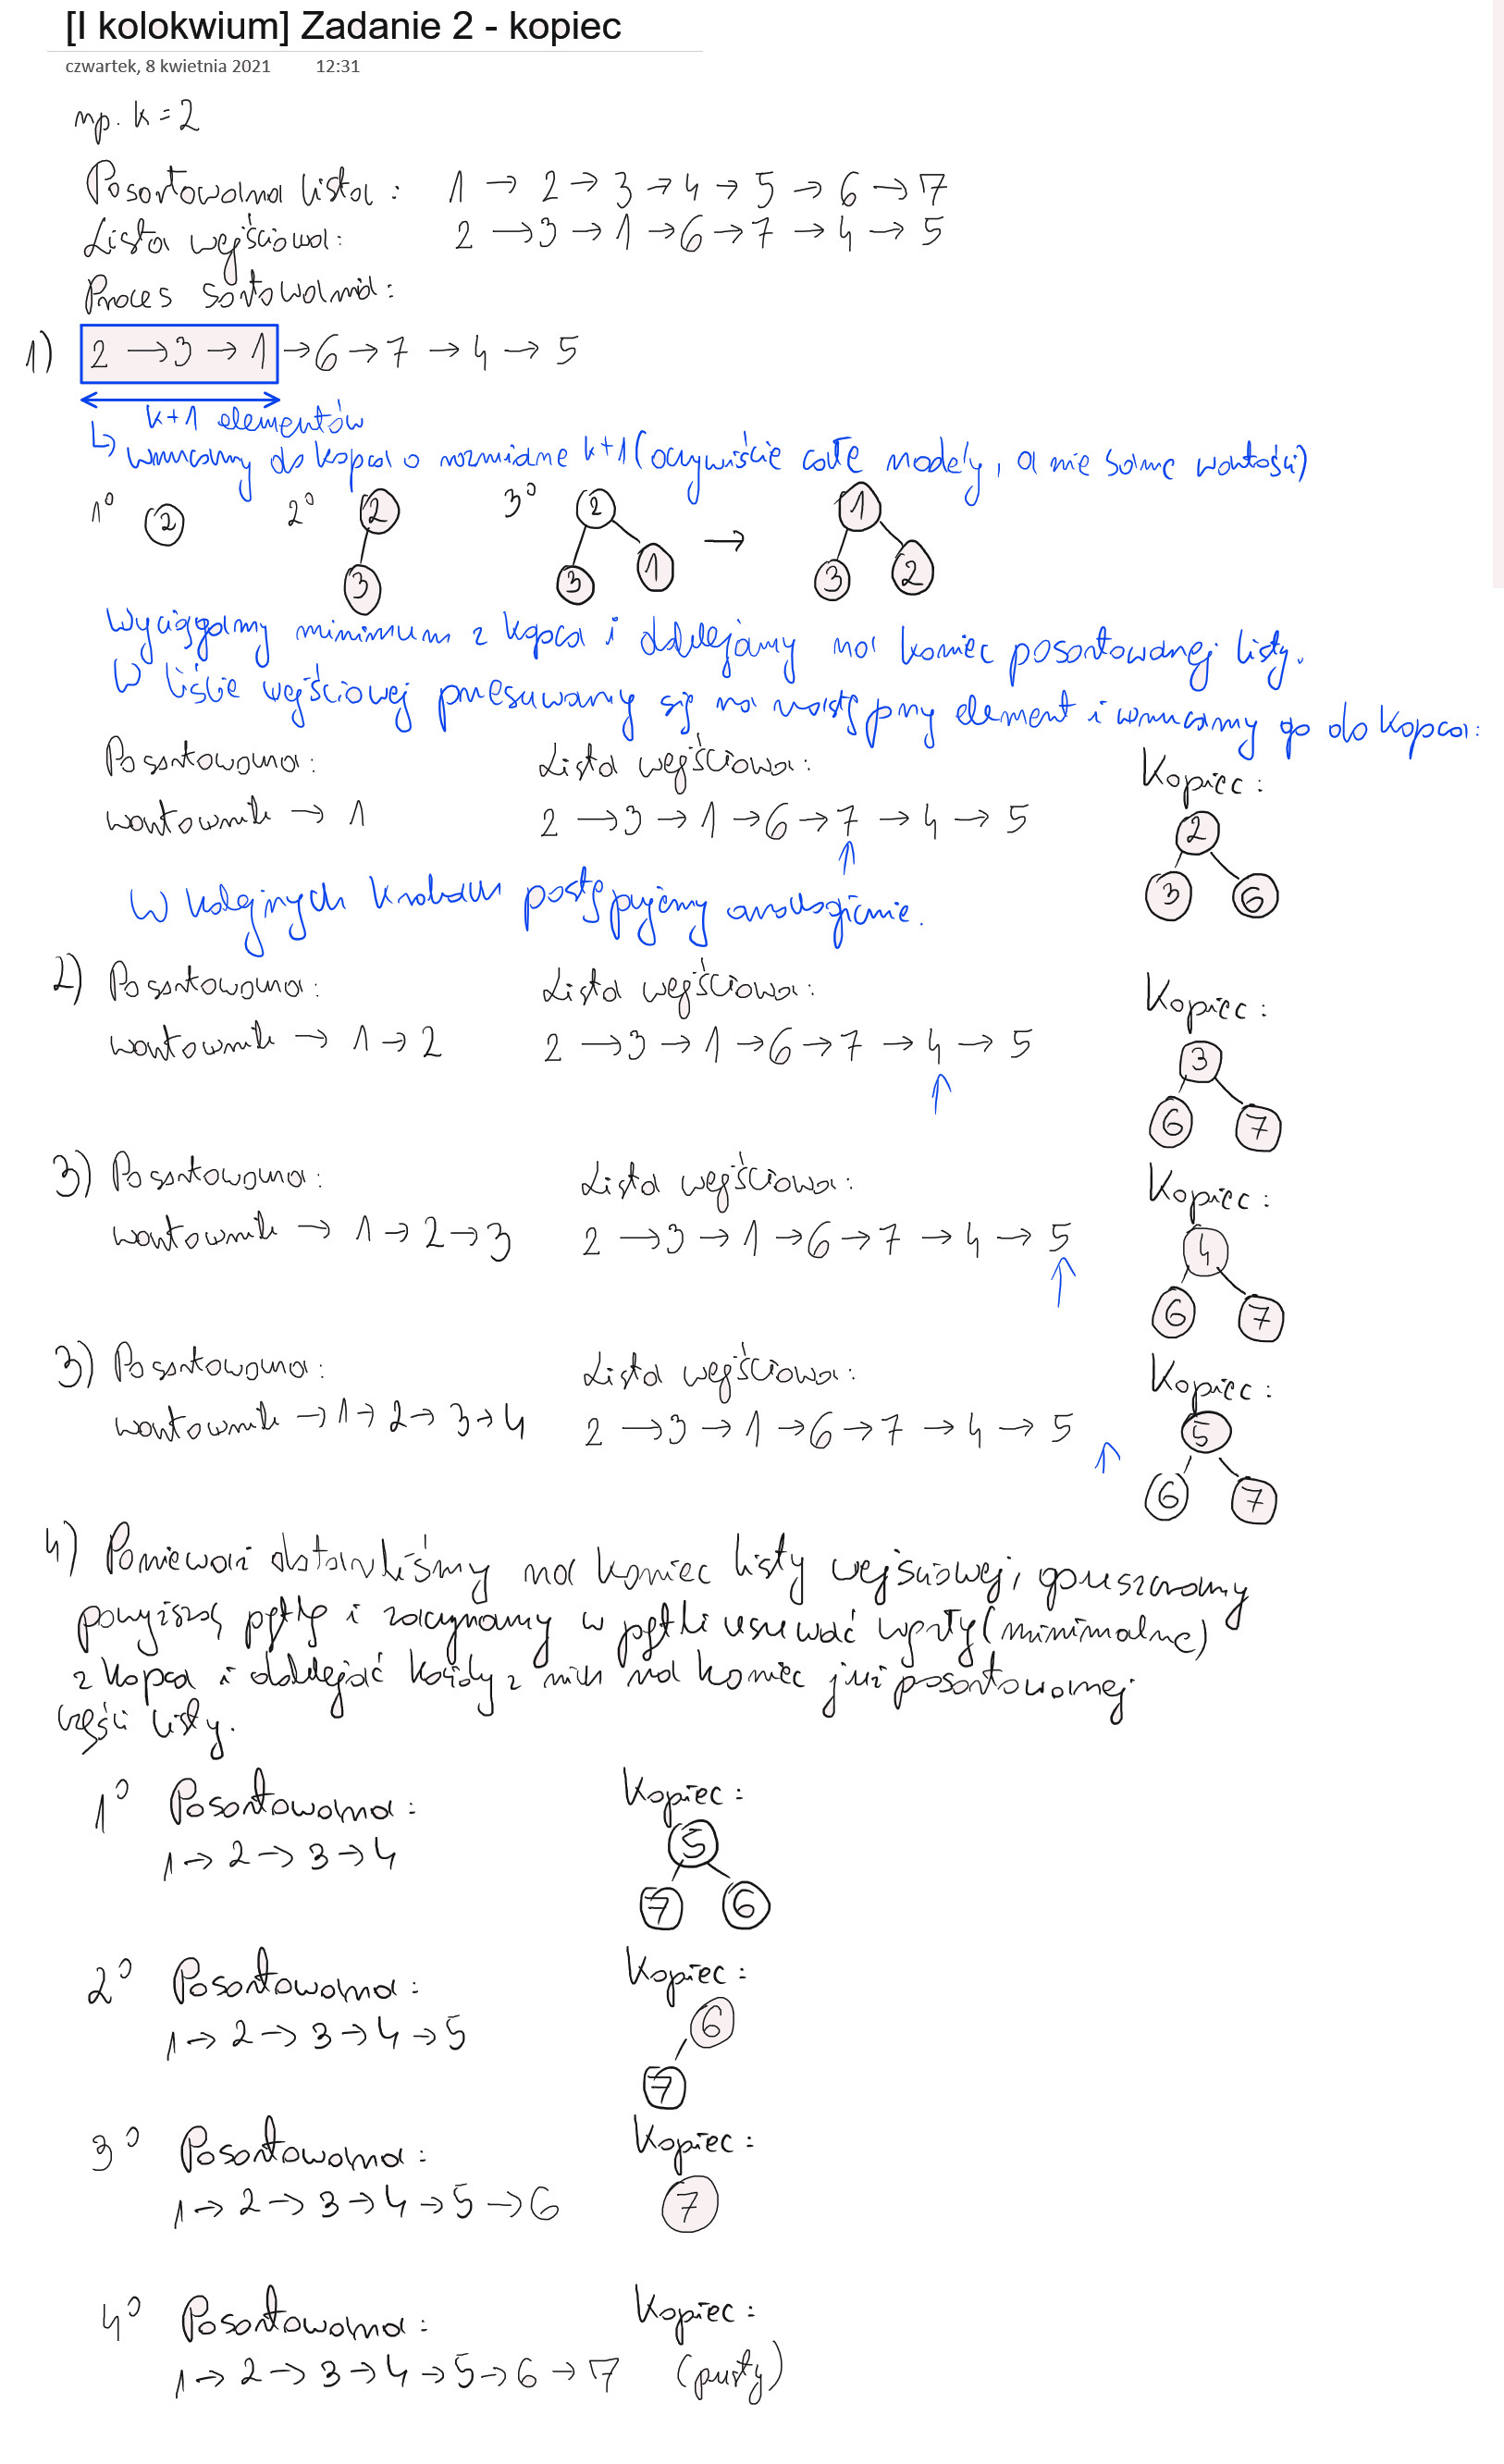

### Implementacja algorytmu

In [2]:
class MinPriorityQueue:
    def __init__(self, maxsize=127):
        if not isinstance(maxsize, int):
            raise TypeError(f"expected 'int', got {str(type(maxsize))[7:-1]}")
        if maxsize <= 0:
            raise ValueError(f"cannot create a {self.__class__.__name__} of a max size {maxsize}")
        self.heap = [None] * maxsize  # Allocate a constant memory space
        self.size = 0
        self._free_idx = 0
    
    def __bool__(self):
        return bool(self._free_idx)
    
    def __len__(self):
        return len(self.heap)
    
    @property
    def heap_size(self):
        return self._free_idx
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert_with_priority(self, priority: 'number', val: object):
        # Add a value as the last node of our Complete Binary Tree
        self.heap[self._free_idx] = (priority, val)
        # Fix heap in order to satisfy a min-heap property
        self._free_idx += 1
        self._heapify_up(self.heap_size - 1)
        
    def get_first(self) -> object:
        return None if not self.heap else self.heap[0]  # Returns a tuple of priority and value
        
    def remove_first(self) -> object:
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last_idx = self._free_idx - 1
        last = self.heap[last_idx]
        self.heap[last_idx] = None
        self._free_idx -= 1
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, self.heap_size)
        return removed # Returns a tuple of priority and value
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx][0] < self.heap[parent_idx][0]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx): 
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self.heap[l][0] < self.heap[curr_idx][0]: 
                    smallest_idx = l
                if r < end_idx and self.heap[r][0] < self.heap[smallest_idx][0]:
                    smallest_idx = r

            if smallest_idx != curr_idx:
                self.swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break
                

def SortH(p, k):
    if k <= 0: return
    
    min_queue = MinPriorityQueue(k + 1)
    # Store the first k + 1 nodes in a queue
    curr = p
    i = 0
    while curr and i < k + 1:
        min_queue.insert_with_priority(curr.val, curr)
        curr = curr.next
        i += 1
        
    # Create a sentinel node to which we will link subsequent nodes in
    # a non-decreasing order
    sorted_last_prev = sentinel = Node()
    
    # Loop till there are some nodes remaining and link currently minimum
    # nodes to the tail of a sorted linked list
    while curr:
        _, min_node = min_queue.remove_first()
        sorted_last_prev.next = min_node
        sorted_last_prev = min_node
        min_queue.insert_with_priority(curr.val, curr)
        curr = curr.next
    
    # Remove the remaining nodes from a min priority queue
    while min_queue:
        _, min_node = min_queue.remove_first()
        sorted_last_prev.next = min_node
        sorted_last_prev = min_node
        
    # Remove the next node of a tail
    sorted_last_prev.next = None
        
    # Return a resulting queue
    return sentinel.next

Kilka testów

In [3]:
runtests(SortH)

----------------------
inp = 2 5 3 7 13 11 17 19 29 23 31 37 43 41 47 53 59 67 61 73 71 79 83 89 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
inp = 2 3 5 7 11 13 17 19 31 23 29 43 41 37 47 53 59 61 67 71 73 79 83 89 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
inp = 2 11 5 7 3 31 13 19 37 29 17 23 41 43 47 53 59 61 67 71 73 79 83 89 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
inp = 2 3 11 7 5 23 17 19 13 29 41 37 31 89 47 53 59 61 67 71 73 43 83 79 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
inp = 2 79 5 7 11 23 17 19 13 29 3 37 41 89 47 53 59 61 31 71 73 67 83 43 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
OK!


###### UWAGA
Niestety w zadaniu nie zostało to powiedziane, a jest to niesamowicie istotna kwestia, która wpływa na trudność implementacji. Po cichu zostało przyjęte założenie, że różnica o maksymalnie $ k $ pozycji wyklucza możliwość przesunięcia elementu na koniec listy (tzn. jeżeli rozpatrujemy element z indeksu $ 0 $ dla pewnego $ k $, to w wynikowej liście musi on się znaleźć pod jednym z indeksów $ \{0, 1, 2, ..., k - 1, k\} $, ale już nie może zostać przesunięty niejako w lewo, czyli na koniec listy, więc nie znajdzie się on napewno pod żadnym spośród indeksów $ \{n - 1, n - 2, ..., n - k\} $. <br>
##### Przykład:

In [4]:
l = makeList([1, 2, 0])
print(printList(SortH(l, 1)))

1 0 2 
None


# II Sposób
### Złożoność obliczeniowa $ O(n \cdot k) $ (gorszy sposób)
##### Z liniowym poszukiwaniem minimum z każdej kolejnej $ k $-elementowej podlisty

### Omówienie algorytmu

Tworzymy "okno" $ k + 1 $-elementowe, z którego wybieramy węzeł o obecnie najmniejszej wartości spośród tych, jakie mają węzły w danym (maksymalnie $ k + 1 $-elementowym oknie). Jeżeli węzeł o najmniejszej wartości jest pierwszym węzłem w bieżącym oknie, idziemy dalej. Natomiast, gdy jest to ostatni węzeł z okna, musimy zaktualizować końcowy węzeł (tzn. zamienić wskaźnik końcowego węzła na przedostatni węzeł w oknie), a ostatni węzeł, będący węzłem o najmniejszej wartości, doczepiamy na początku okna. Jeżeli natomiast najmniejszą wartość ma pewien węzeł ze środka okna, usuwamy go i wrzucamy na początek (podobnie jak we wcześniej opisanych przypadkach). Przesuwamy tak całe okno, dopóki jeko początek nie jest końcem, czyli dopóki jest w nim choć jeden element. Koniec okna posuwamy do przodu do momentu dojścia do końca listy, a początek przesuwamy zawsze.

### Implementacja algorytmu

In [5]:
def get_min_node(begin_prev_node, end_node):
    if begin_prev_node.next is end_node: return end_node
    
    min_prev_node = begin_prev_node
    prev = begin_prev_node.next
    while prev is not end_node:
        if prev.next.val < min_prev_node.next.val:
            min_prev_node = prev
        prev = prev.next
        
    return min_prev_node
    
    
def remove_next_node(prev_node):
    prev_node.next = prev_node.next.next
    
    
def insert_next_node(inserted_node, prev_node):
    inserted_node.next = prev_node.next
    prev_node.next = inserted_node
    
    
def SortH(p, k):
    if k <= 0: return
    
    # Add a sentinel node
    sentinel = Node()
    sentinel.next = p
    
    # Prepare pointers
    begin_prev_node = sentinel
    end_node = sentinel.next
    i = 0
    while i < k + 1 and end_node:
        end_node = end_node.next
        i += 1
        
    # Move the window (a k+1-element sublist) and move currently
    # minimum values to the beginning of a window
    while begin_prev_node.next is not end_node:
        min_prev_node = get_min_node(begin_prev_node, end_node)
        if min_prev_node is not begin_prev_node:
            # Update the end node if this is the currently minimum value
            if min_prev_node.next is end_node:
                end_node = min_prev_node
            # Remove a node and link it at the beginning of the current window
            removed_node = min_prev_node.next
            remove_next_node(min_prev_node)
            insert_next_node(removed_node, begin_prev_node)
        
        if end_node.next:
            end_node = end_node.next
        begin_prev_node = begin_prev_node.next
        
    return sentinel.next

Kilka testów

In [6]:
runtests(SortH)

----------------------
inp = 2 5 3 7 13 11 17 19 29 23 31 37 43 41 47 53 59 67 61 73 71 79 83 89 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
inp = 2 3 5 7 11 13 17 19 31 23 29 43 41 37 47 53 59 61 67 71 73 79 83 89 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
inp = 2 11 5 7 3 31 13 19 37 29 17 23 41 43 47 53 59 61 67 71 73 79 83 89 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
inp = 2 3 11 7 5 23 17 19 13 29 41 37 31 89 47 53 59 61 67 71 73 43 83 79 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
inp = 2 79 5 7 11 23 17 19 13 29 3 37 41 89 47 53 59 61 31 71 73 67 83 43 
out = 2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 
OK
----------------------
OK!
